In [46]:
import numpy as np              # numpy is a general-purpose math package
import yt                       # yt is the data vizualization package
from yt.units import *          # this lets you get things like speed of light in proper units just by typing 'c'
from astropy.table import Table # this is needed for reading in various foggie data byproducts
from astropy.io import ascii    # this too
import matplotlib.pyplot as plt # this is the standard python plotting package, very useful!
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import math

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

foggie_dir = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
# code_path should be the path to the directory where you've cloned the github repo.
code_path = "/Users/hylee/coding/foggie/foggie/"
# Finally, this is the name of the simulation output.

foggie_dir_output = "/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/"

foggie_sim = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
github_dir = "/Users/hylee/coding/foggie/foggie/" 
snap = "RD0042"
foggie_output = '/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/'
track_dir = github_dir + 'halo_infos/008508/nref11c_nref9f/'
track_name = github_dir + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
snap_name = foggie_sim + snap + '/' + snap


In [2]:
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=track_dir + 'halo_c_v',
                             disk_relative=False, do_filter_particles=False, masses_dir=track_dir)

Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/RD0042/RD0042


yt : [INFO     ] 2023-06-22 11:24:13,603 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2023-06-22 11:24:13,604 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-06-22 11:24:13,605 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-22 11:24:13,606 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-22 11:24:13,606 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-22 11:24:13,607 Parameters: current_redshift          = 0
yt : [INFO     ] 2023-06-22 11:24:13,607 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-06-22 11:24:13,608 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-06-22 11:24:13,609 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-06-22 11:24:13,609 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:         col1          col2     col3     col4    col5     col6     col7  col8
------------------- -------- -------- ------- -------- -------- ------- ----
4.4408920985006e-16 0.488865 0.470316 0.50854 0.490865 0.472316 0.51054    9


Parsing Hierarchy : 100%|█████████████████| 4251/4251 [00:00<00:00, 9122.46it/s]
yt : [INFO     ] 2023-06-22 11:24:14,299 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


yt : [INFO     ] 2023-06-22 11:24:29,652 Projection completed
yt : [INFO     ] 2023-06-22 11:24:29,705 Making a fixed resolution buffer of (('gas', 'metallicity')) 70 by 70


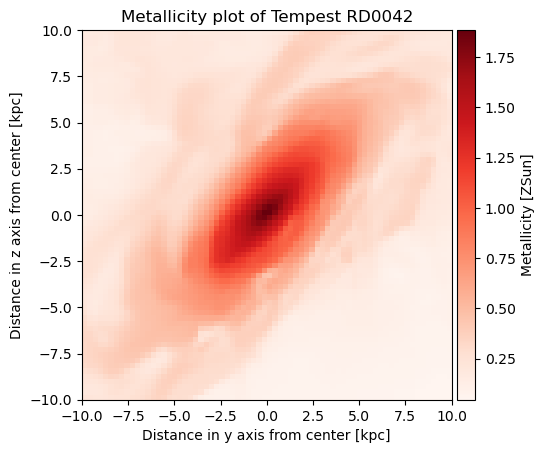

In [3]:
matplotlib.use("Agg")

size = 20
xres = 70
yres = 70
axis = "x"

proj = ds.proj(("gas", "metallicity"), axis , center = ds.halo_center_kpc, 
               data_source = refine_box, weight_field = "density")

width = (size, "kpc")  

res = [xres,yres] 

frb = proj.to_frb(width, res, center = ds.halo_center_kpc)

# Q1 : How to tell which axis is y / z ? => By proj.plot()

# Res actaully works? => It does but due to intrisnic limitation of original data (AMR), Res>70 doens't do good

%matplotlib inline

#plt.title("Metallicity plot of Tempest RD0042")
#plt.xlabel('Distance in y axis from center [kpc]')
#plt.ylabel('Distance in z axis from center [kpc]')
#plt.imshow(np.array(frb["gas", "metallicity"]), cmap='Reds', extent=[-10,10,-10,10])


fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(np.array(frb["gas","metallicity"]), cmap='Reds', extent = [-size/2, size/2, -size/2, size/2])
fig.colorbar(im, cax=cax, orientation='vertical')

cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Metallicity [ZSun]')

ax.set_title("Metallicity plot of Tempest RD0042")
ax.set_xlabel('Distance in y axis from center [kpc]')
ax.set_ylabel('Distance in z axis from center [kpc]')

plt.show()

#plt.savefig(foggie_output + 'FRB_90.png')

In [4]:
# 1 index = 285pc 


In [11]:
od = np.array(frb["gas","metallicity"])

In [13]:
print(od)
print(type(od))

[[0.15844792 0.15610114 0.16532819 ... 0.18925873 0.18647124 0.18277402]
 [0.16801881 0.16729263 0.17767852 ... 0.18179604 0.17871537 0.17837897]
 [0.17577217 0.17261858 0.17587023 ... 0.1810782  0.1813866  0.18169878]
 ...
 [0.19789765 0.19465351 0.19666012 ... 0.04864931 0.04827542 0.04971692]
 [0.18774366 0.18977079 0.19224391 ... 0.04575077 0.04547063 0.0468442 ]
 [0.21336403 0.21657188 0.20972967 ... 0.04528491 0.04501983 0.0463825 ]]
<class 'numpy.ndarray'>


Text(0, 0.5, 'Metallicity [log ZSun]')

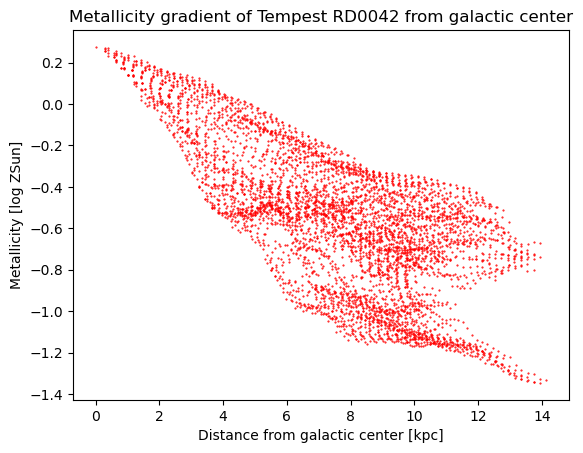

In [52]:
OD_Met = []
OD_Rad = []
for i in range(70):
    for j in range(70):
        this_metal_value = od[i][j]
        xindex = i
        yindex = j
        Radius = (math.sqrt(((yindex-34)**2+(xindex-34)**2)))*0.2857
        #print(this_metal_value, Radius)
        OD_Met.append(this_metal_value)
        OD_Rad.append(Radius)
        
        
plt.plot(OD_Rad, np.log10(OD_Met), 'ro', markersize = 0.5)
plt.title("Metallicity gradient of Tempest RD0042 from galactic center")
plt.xlabel("Distance from galactic center [kpc]")
plt.ylabel("Metallicity [log ZSun]")
#print(Radius)


In [ ]:
proj.plot()

In [ ]:
proj2 = ds.proj(("gas", "metallicity"), "y" , center = ds.halo_center_kpc, 
               data_source = refine_box, weight_field = "density")

res2 = [10, 10] 

frb2 = proj2.to_frb(width, res2, center = ds.halo_center_kpc)

%matplotlib inline

plt.imshow(np.array(frb2["gas", "metallicity"]))

In [ ]:
proj3 = ds.proj(("gas", "metallicity"), "z" , center = ds.halo_center_kpc, 
               data_source = refine_box, weight_field = "density")

frb3 = proj3.to_frb(width, res, center = ds.halo_center_kpc)

%matplotlib inline

plt.imshow(np.array(frb3["gas", "metallicity"]))

In [53]:
print("hello world")

hello world
